In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

In [3]:
#===========================================================
# File Name : B_DA_RETL_CHURN                            
# Description :                                             
# Date : 2020-11-12                                         
# Writer : Yoon Jun Beom
# Packages :                                                
# Note :                           
#===========================================================

In [4]:
# library import 
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
# get parameter
args_mm = '202011'

In [6]:
# check the parameters
if len(args_mm) != 6 : 
    print("arg's length is not 6 char <yyyymm>")
    raise Error

churn_base = pd.read_csv(r".\b_da_retl_churn_anl_md_ds.csv")

In [7]:
churn_base.drop('레코드 수', axis = 1, inplace = True)

In [7]:
churn_base = churn_base[['reg_no','amt_day_cnt', 'avg_amt', 'avg_cnt', 'avg_mm_amt', 'avg_mm_cnt',
       'bf_month_diff_amt', 'bf_month_diff_cnt', 'high_lw_term',
       'join_term', 'last_xmit_date', 'm3_sd_amt', 'm3_sd_cnt', 'm_00_app_amt',
       'm_00_app_cnt', 'm_01_app_amt', 'm_01_app_cnt', 'm_02_app_amt',
       'm_02_app_cnt', 'm_03_app_amt', 'm_03_app_cnt', 'm_04_app_amt',
       'm_04_app_cnt', 'm_05_app_amt', 'm_05_app_cnt', 'max_amt_month',
       'min_amt_month', 'min_mm_amt', 'min_mm_cnt', 'min_xmit_date',
       'month_cnt', 'mx_mm_amt', 'mx_mm_cnt', 'mx_xmit_date', 
       'sd_amt', 'sd_mm_amt', 'sd_mm_cnt', 'sum_amt', 'sum_cnt',
       'wk2_amt_diff', 'wk2_cnt_diff']]

In [8]:
map_code_info = pd.read_csv(r".\b_svr_map_code_info.csv")
map_code_info.drop(['레코드 수', 'load_dtm'], axis = 1, inplace = True)
map_code_info.head()

,cd_lv1,cd_lv2,cd_lv2_nm,cd_lv3,map_cd,map_gubun
0,B72,M72,의료관련서비스업,S07,S07,S
1,B71,M71,수의업,S04,S04,S
2,B70,M70,유사의료업,S03,S03,S
3,B69,M69,약국/한약방,S02,S02,S
4,B68,M68,병원,S01,S01,S


# 가맹점 코드 분류 체계 변경

In [9]:
li = [ 
["부페", "중식", "퓨전/기타음식점", "한식-일반음식점", "양식", "일식/수산물", "분식/휴게음식점", "패스트푸드/제과점"]	, "음식점" ,
["실내스포츠시설운영업", "실외스포츠시설운영업", "스포츠시설운영업"]	, "스포츠시설운영업",
["예체능계학원", "외국어학원", "일반교과학원", "기타학원", "학습지/코칭교육"]	, "학원",
["자동차및부품판매점", "자동차정비/세차/주차장"]	, "자동차관련판매점",
["유흥주점-무도/가무", "일반유흥주점"]	, "주점",
["독서실/도서관"]	, "기타시설운영업",
["세탁/가사/전문서비스", "주택수리서비스", "용품수리서비스"]	, "대행/용역/인력알선",
["약국/한약방", "유사의료업", "의료관련서비스업"]	, "병원",
["예식/의례/관혼상제"]	, "수의업"
]    
a = []  
b = []

for i in li:
    if type(i) == list :
        a.append(i)
    else :
        b.append(i)

In [10]:
for i, j in zip(a, b):
    map_code_info['cd_lv2_nm'].replace(i, j, inplace= True)

In [11]:
map_code_info.query("map_gubun=='V'").cd_lv2_nm.nunique()

50

In [12]:
recent_sales = pd.read_csv(r"./last_month.csv")

In [13]:
churn_base.head()

,reg_no,amt_day_cnt,avg_amt,avg_cnt,avg_mm_amt,avg_mm_cnt,bf_month_diff_amt,bf_month_diff_cnt,high_lw_term,join_term,...,mx_mm_amt,mx_mm_cnt,mx_xmit_date,sd_amt,sd_mm_amt,sd_mm_cnt,sum_amt,sum_cnt,wk2_amt_diff,wk2_cnt_diff
0,7575000187,109,103491.4,11.3,2256114,247.4,0,0,4284550,168,...,4549400,475,20201130,70723.10,1772310.2,191.2,11280570,1237,481240,36
1,1048118780,183,5347121.9,445.2,163087219,13578.5,10857940,403,50869646,5816,...,181037721,15145,20201130,2958857.33,16299689.8,1560.6,978523315,81471,-16116500,-838
2,8080901217,183,16595050.5,170.6,506149042,5203.5,0,0,324934178,325,...,691286283,6878,20201130,6403905.70,125992809.7,1120.2,3036894251,31221,51358656,619
3,5229901046,71,1512400.4,51.2,21476086,727.6,0,0,41189031,166,...,44525831,1366,20201128,783378.27,15490153.5,482.9,107380431,3638,-767800,-79
4,2078514698,183,21590217.0,271.0,658501621,8266.5,0,0,149752692,1412,...,744330413,9125,20201130,9282400.52,50027808.8,634.4,3951009728,49599,-14176320,359


In [14]:
month_tot = churn_base

In [15]:
# feature engineering 
# rto (cnt/ amt)
for i in range(6):
    month_tot[f'm{str(i+1)}_cnt_rto'] = month_tot[f'm_{str(i).zfill(2)}_app_cnt'] / month_tot['sum_cnt'] 
    month_tot[f'm{str(i+1)}_amt_rto'] = month_tot[f'm_{str(i).zfill(2)}_app_amt'] / month_tot['sum_amt'] 

In [16]:
# MoM
for i in range(5):
    month_tot[f'm{str(i).zfill(2)}_cnt_updn_rto'] = (month_tot[f'm_{str(i).zfill(2)}_app_cnt'] / month_tot[f'm_{str(i+1).zfill(2)}_app_cnt']) -1 
    month_tot[f'm{str(i).zfill(2)}_amt_updn_rto'] = (month_tot[f'm_{str(i).zfill(2)}_app_amt'] / month_tot[f'm_{str(i+1).zfill(2)}_app_amt']) -1 

In [17]:
for col in month_tot.columns[month_tot.columns.str.contains(r"(_rto)")]:
    month_tot.fillna({col:0}, inplace = True)

In [18]:
month_tot.columns[month_tot.columns.str.contains(r"(_cnt_updn_rto)")]

Index(['m00_cnt_updn_rto', 'm01_cnt_updn_rto', 'm02_cnt_updn_rto',
       'm03_cnt_updn_rto', 'm04_cnt_updn_rto'],
      dtype='object')

In [19]:
month_tot.replace([np.inf, -np.inf], np.nan, inplace = True)

In [20]:
for col in month_tot.columns[month_tot.columns.str.contains(r"(_rto)")]:
    month_tot.fillna({col:0}, inplace = True)

In [21]:
month_tot['avg_cnt_updn_rto'] = month_tot[month_tot.columns[month_tot.columns.str.contains(r"(_cnt_updn_rto)")]].mean(1)
month_tot['avg_amt_updn_rto'] = month_tot[month_tot.columns[month_tot.columns.str.contains(r"(_amt_updn_rto)")]].mean(1)

In [22]:
debit_retl = pd.read_csv(r".\debit_retl.csv", dtype='str')

In [23]:
debit_retl = debit_retl.query("dbr_cflag == '1'")[['reg_no','dbr_new_svr_code']]

In [24]:
debit_retl = debit_retl.merge(map_code_info.query("map_gubun == 'V'")[['map_cd', 'cd_lv2_nm']], 'left', left_on= 'dbr_new_svr_code', right_on = 'map_cd')

In [25]:
month_tot['reg_no'] = month_tot.reg_no.astype("str")

In [26]:
base_tot = month_tot.merge(debit_retl, 'inner', on = 'reg_no')

In [27]:
base_tot = base_tot[base_tot.cd_lv2_nm.notna()]

In [28]:
base_tot['norm_wrk_day'] = \
pd.to_datetime(base_tot.mx_xmit_date, format = "%Y%m%d") - pd.to_datetime(base_tot.min_xmit_date, format = "%Y%m%d") + np.timedelta64(1, 'D')

base_tot['norm_wrk_day'] = base_tot.norm_wrk_day / np.timedelta64(1, 'D')

In [29]:
base_tot['amt_day_rto'] = base_tot.amt_day_cnt / base_tot.norm_wrk_day

In [30]:
reg_churn = base_tot.drop(["mx_xmit_date", "last_xmit_date","min_xmit_date", "norm_wrk_day", "amt_day_cnt",
                      "min_mm_amt", "mx_mm_amt", "max_amt_month", "min_amt_month", "mx_mm_cnt", "min_mm_cnt"], axis = 1)

In [31]:
#=====================================#
#        예측 모형 적용
#=====================================#

In [32]:
import joblib

In [33]:
rf = joblib.load('churn_model.pkl')

In [34]:
reg_churn['cd_lv2_nm_f'] = reg_churn.cd_lv2_nm.factorize()[0]

In [35]:
X = reg_churn.drop(['reg_no','dbr_new_svr_code','map_cd', 'cd_lv2_nm'], axis= 1)

In [36]:
len(X.columns)

56

In [37]:
y_pred = rf.predict_proba(X)[:,1] 

In [38]:
reg_churn['result'] = y_pred

In [41]:
reg_churn['result2'] = np.digitize(reg_churn['result'], [0, 0.15, 0.35, 0.5, 1.0], right = False)

In [42]:
reg_churn[['reg_no','result', 'result2']].groupby("result2").reg_no.nunique()

result2
1    69776
2     7855
3     1376
4      746
Name: reg_no, dtype: int64

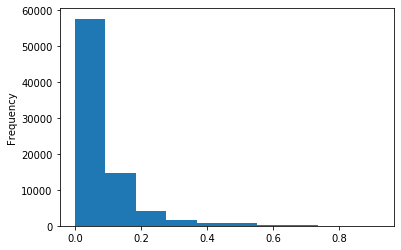

In [46]:
reg_churn['result'].plot(kind = 'hist')

In [47]:
reg_churn[['reg_no','result', 'result2']].groupby("result2").reg_no.nunique() / len(reg_churn)

result2
1    0.874901
2    0.098492
3    0.017253
4    0.009354
Name: reg_no, dtype: float64